#### This notebook is about using feature selection techniques to obtain best features for regression. The target is such that Target(t)=SMA(t+n), where n is the number of days to be averaged.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from technical_indicators import *

pd.set_option("display.max_columns", 15)
pd.set_option("display.width", 500)
pd.set_option("display.max_rows", 100)

In [2]:
df = pd.read_csv('Data/EUR_USD_Daily.csv', index_col=0)
df = moving_average(df, 5)
df = moving_average(df, 8)
df = moving_average(df, 10)
df = moving_average(df, 13)
df = moving_average(df, 15)
df = moving_average(df, 20)
df = moving_average(df, 21)
df = EMA(df, 5)
df = EMA(df, 10)
df = EMA(df, 15)
df = EMA(df, 20)
df = MACD(df, 12, 26, 9)
df = MACD(df, 21, 55, 13)
df = stochastic_oscillator(df, 5)
df = stochastic_oscillator(df, 8)
df = stochastic_oscillator(df, 10)
df = stochastic_oscillator(df, 13)
df = stochastic_oscillator(df, 15)
df = stochastic_oscillator(df, 20)
df = stochastic_oscillator(df, 21)
df = williams_R(df, 5)
df = williams_R(df, 7)
df = williams_R(df, 8)
df = williams_R(df, 10)
df = williams_R(df, 13)
df = williams_R(df, 14)
df = williams_R(df, 15)
df = williams_R(df, 20)
df = williams_R(df, 21)
df = relative_strength_index(df, 5)
df = relative_strength_index(df, 7)
df = relative_strength_index(df, 8)
df = relative_strength_index(df, 10)
df = relative_strength_index(df, 13)
df = relative_strength_index(df, 14)
df = relative_strength_index(df, 15)
df = relative_strength_index(df, 20)
df = relative_strength_index(df, 21)
df = momentum(df, 5)
df = momentum(df, 7)
df = momentum(df, 8)
df = momentum(df, 10)
df = momentum(df, 13)
df = momentum(df, 14)
df = momentum(df, 15)
df = momentum(df, 20)
df = momentum(df, 21)
df = change_rate(df, 1)
df = change_rate(df, 2)
df = change_rate(df, 3)
df = change_rate(df, 4)
df = change_rate(df, 5)
df = average_true_range(df, 7)
df = average_true_range(df, 14)
df = average_true_range(df, 21)
df = average_directional_index_and_DI(df, 5)
df = average_directional_index_and_DI(df, 7)
df = average_directional_index_and_DI(df, 8)
df = average_directional_index_and_DI(df, 10)
df = average_directional_index_and_DI(df, 13)
df = average_directional_index_and_DI(df, 14)
df = average_directional_index_and_DI(df, 15)
df = average_directional_index_and_DI(df, 20)
df = average_directional_index_and_DI(df, 21)

In [3]:
def SMA_regression_target(df, n):
    df['Target'] = df['Price'].rolling(window=n, min_periods=n).mean()
    df['Target'] = df['Target'].round(5)
    df['Target'] = df['Target'].shift(-n)
    df.dropna(inplace=True)

    return df

# Set how many days look ahead
look_ahead = 5
df = SMA_regression_target(df, look_ahead)

In [4]:
# Normalise data
col_name = list(df)
x = df.values

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=col_name)

# # normalized_df = (df-df.min())/(df.max()-df.min())

X = df.iloc[:,:-1]  #independent columns
y = df.iloc[:,-1] # target

In [5]:
from scipy.stats import pearsonr

# {‘pearson’, ‘kendall’, ‘spearman’}
df_corr = df[df.columns[1:]].corr(method='pearson')['Target'][:-1]
df_corr.sort_values(ascending=False, inplace=True)
print(df_corr.head(20))

df_corr = df_corr.reset_index()
feature_list = list(df_corr['index'].head(20))
print(feature_list)

Low              0.997450
High             0.997328
ema5             0.997046
Open             0.996868
5ma              0.996666
ema10            0.995777
8ma              0.995655
10ma             0.994982
ema15            0.994463
13ma             0.993970
15ma             0.993280
ema20            0.993131
20ma             0.991492
21ma             0.991127
ATR_scaled 21    0.292775
ATR 21           0.292775
ATR 14           0.290309
ATR_scaled 14    0.290309
ATR 7            0.284001
ATR_scaled 7     0.284001
Name: Target, dtype: float64
['Low', 'High', 'ema5', 'Open', '5ma', 'ema10', '8ma', '10ma', 'ema15', '13ma', '15ma', 'ema20', '20ma', '21ma', 'ATR_scaled 21', 'ATR 21', 'ATR 14', 'ATR_scaled 14', 'ATR 7', 'ATR_scaled 7']


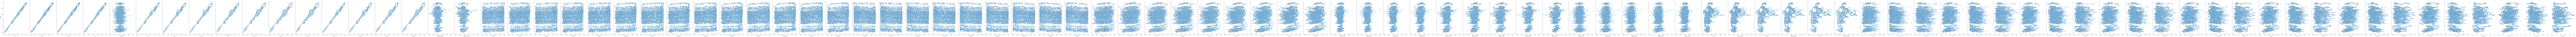

In [6]:
import seaborn as sns

# print(col_name[:-1])
sns.pairplot(df, x_vars=col_name[:-1], y_vars=col_name[-1], height=7, aspect=0.7)

Price            0.420
Low              0.055
20ma             0.050
RSI 21           0.040
ema5             0.035
ema20            0.030
momentum 5       0.030
10ma             0.025
ATR 7            0.025
High             0.020
8ma              0.020
momentum 10      0.020
ATR_scaled 7     0.020
5ma              0.015
ema10            0.015
MACD_21,55,13    0.015
ATR_scaled 21    0.015
ADX 7            0.015
21ma             0.010
%K_W8            0.010
dtype: float64
['Price', 'Low', '20ma', 'RSI 21', 'ema5', 'ema20', 'momentum 5', '10ma', 'ATR 7', 'High', '8ma', 'momentum 10', 'ATR_scaled 7', '5ma', 'ema10', 'MACD_21,55,13', 'ATR_scaled 21', 'ADX 7', '21ma', '%K_W8']


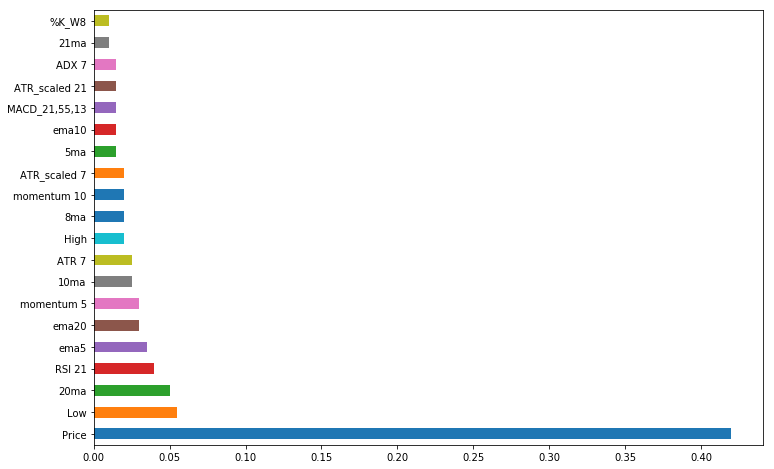

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

clf = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=1, random_state=0, loss='ls').fit(X, y)
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh', figsize=(12,8))

tmp_df = feat_importances.nlargest(20)
print(tmp_df)
print(tmp_df.index.tolist())

plt.show()